# Image-to-text model

In [1]:
from transformers import pipeline

In [2]:
caption = pipeline(task="image-to-text", model="nlpconnect/vit-gpt2-image-captioning")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.61k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/982M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/241 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/120 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/228 [00:00<?, ?B/s]

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration. Please open a PR/issue to update `preprocessor_config.json` to use `image_processor_type` instead of `feature_extractor_type`. This warning will be removed in v4.40.


In [3]:
caption("https://farm4.staticflickr.com/3133/2588284625_7f1b1f571b_z.jpg", max_new_tokens=20)

We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.


[{'generated_text': 'a cat laying on a floor next to a shoe '}]

In [4]:
caption("https://farm1.staticflickr.com/70/174113374_29bd1b4b11_z.jpg", max_new_tokens=20)

[{'generated_text': 'a man riding a bike on a bridge over a river '}]

In [5]:
caption("https://farm9.staticflickr.com/8325/8138362437_f23d016193_z.jpg", max_new_tokens=20)

[{'generated_text': 'a large jetliner flying over a beach '}]

# Text-to-image model

In [3]:
!pip install diffusers accelerate

In [4]:
!pip install accelerate

In [5]:
import torch
import matplotlib.pyplot as plt
from diffusers import StableDiffusionPipeline
from diffusers import EulerDiscreteScheduler

In [6]:
model = "stabilityai/stable-diffusion-2"
scheduler = EulerDiscreteScheduler.from_pretrained(model, subfolder="scheduler")
generator = StableDiffusionPipeline.from_pretrained(model, scheduler=scheduler, torch_dtype=torch.float16).to("cuda")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [14]:
image = generator("human hands").images[0]

  0%|          | 0/50 [00:00<?, ?it/s]

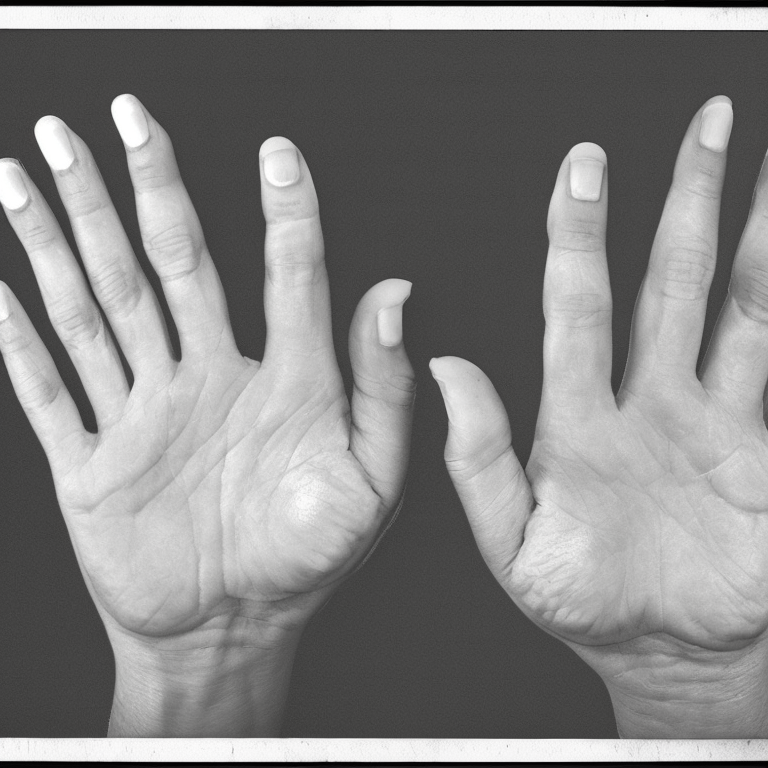

In [15]:
image